In [10]:
#!pip install tweepy
#!pip install configparser
#!pip install pandas
#!pip install tweepy[async]
#!pip install git+https://github.com/tweepy/tweepy.git
#!pip install textblob
#import tweepy
import pandas as pd
import numpy as np
import requests
import os
import re
import csv
from sklearn.metrics import accuracy_score
from sklearn.metrics import matthews_corrcoef


In [11]:

input = "/content/drive/MyDrive/fyp/fyp2/final models and datasets/dataset/dataset_new_with_self_label_final_5.0:3.0:3.0/test_dataset_with_Scores_lex.csv"
#input2 = "/content/drive/MyDrive/fyp/fyp2/final models and datasets/dataset/dataset_2:5:3/test_with_score_lex.csv"
#full_input = "/content/drive/MyDrive/fyp/fyp2/final models and datasets/dataset/dataset_new_with_self_label_final_5.0:3.0:3.0/test_dataset_with_Scores.csv"
full_input = "/content/drive/MyDrive/fyp/fyp2/final models and datasets/dataset/dataset_new_with_self_label_3.0:4.0:4.0/test_dataset_with_Scores.csv"
display(input)

'/content/drive/MyDrive/fyp/fyp2/final models and datasets/dataset/dataset_new_with_self_label_final_5.0:3.0:3.0/test_dataset_with_Scores_lex.csv'

In [12]:
df = pd.read_csv(input)
#df = df.append(pd.read_csv(input2))
def change_spam_to_neutral_label(label):
  if label == 'spam':
    return 'Neutral'
  else:
    return(label)

df['label'] = df['label'].apply(change_spam_to_neutral_label)
display(df)

,Unnamed: 0,Unnamed: 0.1,text,label,source,quality,random_sent,Negative_sent,Positive_sent,Neutral_sent,afinn_score,afinn_sent,vader_score,vader_sent,modified_vader_score,modified_vader_sent,textblob_score,textblob_sent
0,0,825,LEOPARD TOKEN🚀 🎯🎯 ✅Liquidity is locked ✅Certi...,Neutral,incomplete_valid,high,Negative,Negative,Positive,Neutral,0.000000,Neutral,0.0000,Neutral,0.0000,Neutral,0.000000,Neutral
1,1,323,$FTM is DIPPING! (z.score=-2.15) @ $2.47 11.4%...,Negative,self_manual,high,Positive,Negative,Positive,Neutral,0.000000,Neutral,-0.3595,Negative,-0.3595,Negative,0.500000,Positive
2,2,606,Full thanks to as they have analysed this Bit...,Positive,incomplete_valid,high,Positive,Negative,Positive,Neutral,0.000000,Neutral,0.6845,Positive,0.6845,Positive,0.383333,Positive
3,3,548,Full thanks to as they have analysed this Bit...,Positive,incomplete_valid,high,Negative,Negative,Positive,Neutral,0.000000,Neutral,0.6845,Positive,0.6845,Positive,0.383333,Positive
4,4,509,Full thanks to as they have analysed this Bit...,Positive,incomplete_valid,high,Neutral,Negative,Positive,Neutral,0.000000,Neutral,0.6845,Positive,0.6845,Positive,0.383333,Positive
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
833,833,530,Full thanks to as they have analysed this Bit...,Positive,incomplete_valid,high,Negative,Negative,Positive,Neutral,0.000000,Neutral,0.6845,Positive,0.6845,Positive,0.383333,Positive
834,834,660,Full thanks to as they have analysed this Bit...,Positive,incomplete_valid,high,Positive,Negative,Positive,Neutral,0.000000,Neutral,0.6845,Positive,0.6845,Positive,0.383333,Positive
835,835,780,💰💰Full thanks to as they have analysed this B...,Neutral,new_turk_high,high,Positive,Negative,Positive,Neutral,0.000000,Neutral,0.4655,Positive,0.4655,Positive,0.400000,Positive
836,836,340,A heartly thanks to for giving me right tips...,Positive,new_turk_high,high,Neutral,Negative,Positive,Neutral,0.588235,Positive,0.9298,Positive,0.9298,Positive,0.355804,Positive


In [13]:

def find_metrics(df):
  col_names = []
  accu = []
  matthew =[]
  true_col = 'label'
  for name in df:
    if name.endswith("_sent"):
      #df_out[name + "_accuracy"] = accuracy_score[df[true],df[name]]
      col_names.append(name[:-5])

  df_out = pd.DataFrame(columns = col_names)

  for name in col_names:
    print(name)
    true = df[true_col].tolist()
    pred = df[name+"_sent"].tolist()
    #print(true)
    accu.append( accuracy_score(true,pred)) 
    matthew.append( matthews_corrcoef(true,pred) )
  #df_out.loc['accuracy'] = accu
  df_out.loc["MATTHEW'S CORRELATION COEFFICIENT (MCC)"] = matthew
  return df_out.T.sort_values(by=["MATTHEW'S CORRELATION COEFFICIENT (MCC)"])


df_metric = find_metrics(df)
df_metric.to_csv("/content/df_metric.csv")
display(df_metric)




random
Negative
Positive
Neutral
afinn
vader
modified_vader
textblob


,MATTHEW'S CORRELATION COEFFICIENT (MCC)
Negative,0.000000
Positive,0.000000
Neutral,0.000000
random,0.012846
afinn,0.087959
textblob,0.412147
vader,0.484326
modified_vader,0.490468


In [14]:

df_full = pd.read_csv(full_input)

df_full['label']=df_full['label'].apply(change_spam_to_neutral_label)
display(df_full)

,Unnamed: 0,Unnamed: 0.1,text,label,source,quality,random_sent,Negative_sent,Positive_sent,Neutral_sent,...,l3cube-pune/MarathiSentiment_score,l3cube-pune/MarathiSentiment_sent,Tomas23/twitter-roberta-base-mar2022-finetuned-sentiment_score,Tomas23/twitter-roberta-base-mar2022-finetuned-sentiment_sent,elozano/tweet_sentiment_eval_score,elozano/tweet_sentiment_eval_sent,amansolanki/autonlp-Tweet-Sentiment-Extraction-20114061_score,amansolanki/autonlp-Tweet-Sentiment-Extraction-20114061_sent,cardiffnlp/twitter-xlm-roberta-base-sentiment_score,cardiffnlp/twitter-xlm-roberta-base-sentiment_sent
0,0,681,Full thanks to as they have analysed this Bit...,Positive,incomplete_valid,high,Negative,Negative,Positive,Neutral,...,-1,Negative,1,Positive,1,Positive,1,Positive,1,Positive
1,1,270,Current Bitcoin Price is $53655 BTC Crypto,Positive,manual,high,Positive,Negative,Positive,Neutral,...,0,Neutral,0,Neutral,0,Neutral,0,Neutral,0,Neutral
2,2,759,Full thanks to as they have analysed this Bit...,Neutral,new_turk_high,high,Positive,Negative,Positive,Neutral,...,0,Neutral,1,Positive,1,Positive,1,Positive,1,Positive
3,3,899,"Dear Mining Council, Please contact me. I nee...",Neutral,incomplete_valid,high,Positive,Negative,Positive,Neutral,...,0,Neutral,1,Positive,0,Neutral,0,Neutral,0,Neutral
4,4,221,. opening to Bitcoin and the American Experime...,Neutral,self_manual,high,Positive,Negative,Positive,Neutral,...,0,Neutral,1,Positive,1,Positive,0,Neutral,1,Positive
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1015,1015,110,"- $46,400 / £33,585 21.55 Naks per USD 29....",Positive,manual,high,Negative,Negative,Positive,Neutral,...,0,Neutral,0,Neutral,0,Neutral,0,Neutral,0,Neutral
1016,1016,561,Full thanks to as they have analysed this Bit...,Positive,incomplete_valid,high,Neutral,Negative,Positive,Neutral,...,-1,Negative,1,Positive,1,Positive,1,Positive,1,Positive
1017,1017,821,LEOPARD TOKEN🚀 🏡🏡 ✅Liquidity is locked ✅Certi...,Neutral,incomplete_valid,high,Positive,Negative,Positive,Neutral,...,0,Neutral,0,Neutral,0,Neutral,0,Neutral,0,Neutral
1018,1018,933,Pssst.. it’s Bitcoin. It’s always been Bitcoin,Neutral,incomplete_valid,high,Neutral,Negative,Positive,Neutral,...,0,Neutral,0,Neutral,1,Positive,0,Neutral,0,Neutral


In [15]:
df_metric_full = find_metrics(df_full)

display(df_metric_full)


random
Negative
Positive
Neutral
afinn
vader
textblob
flair
svalabs/twitter-xlm-roberta-bitcoin-sentiment
finiteautomata/bertweet-base-sentiment-analysis
cardiffnlp/bertweet-base-sentiment
l3cube-pune/MarathiSentiment
Tomas23/twitter-roberta-base-mar2022-finetuned-sentiment
elozano/tweet_sentiment_eval
amansolanki/autonlp-Tweet-Sentiment-Extraction-20114061
cardiffnlp/twitter-xlm-roberta-base-sentiment


,MATTHEW'S CORRELATION COEFFICIENT (MCC)
random,-0.038577
Negative,0.000000
Positive,0.000000
Neutral,0.000000
flair,0.000000
svalabs/twitter-xlm-roberta-bitcoin-sentiment,0.035142
afinn,0.082663
l3cube-pune/MarathiSentiment,0.325444
textblob,0.356092
vader,0.410729


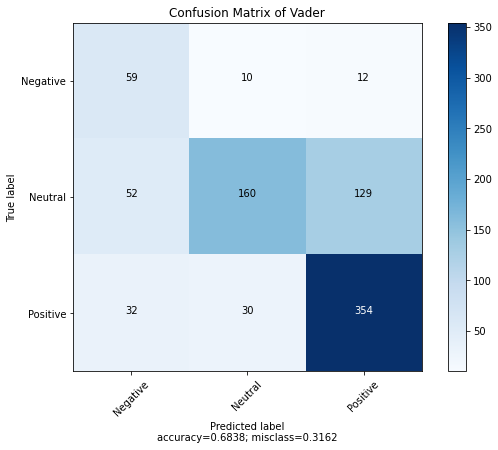

,precision,recall,f1-score,support
Negative,0.412587,0.728395,0.526786,81
Neutral,0.800000,0.469208,0.591497,341
Positive,0.715152,0.850962,0.777168,416
macro avg,0.642580,0.682855,0.631817,838
weighted avg,0.720433,0.683771,0.677413,838


In [16]:
import numpy as np
import matplotlib.pyplot as plt

def convert_label2num(label):
  if label == "Positive":
    return 2
  elif label == "Neutral":
    return 1
  elif label == "Negative":
    return 0
  elif label == "spam":
    return 1
  else:
    print("potential error as label is ",label)
    return 1


def plot_confusion_matrix(cm,
                          target_names,
                          title='Confusion matrix',
                          cmap=None,
                          normalize=False):
    """
    given a sklearn confusion matrix (cm), make a nice plot

    Arguments
    ---------
    cm:           confusion matrix from sklearn.metrics.confusion_matrix

    target_names: given classification classes such as [0, 1, 2]
                  the class names, for example: ['high', 'medium', 'low']

    title:        the text to display at the top of the matrix

    cmap:         the gradient of the values displayed from matplotlib.pyplot.cm
                  see http://matplotlib.org/examples/color/colormaps_reference.html
                  plt.get_cmap('jet') or plt.cm.Blues

    normalize:    If False, plot the raw numbers
                  If True, plot the proportions

    Usage
    -----
    plot_confusion_matrix(cm           = cm,                  # confusion matrix created by
                                                              # sklearn.metrics.confusion_matrix
                          normalize    = True,                # show proportions
                          target_names = y_labels_vals,       # list of names of the classes
                          title        = best_estimator_name) # title of graph

    Citiation
    ---------
    http://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html

    """
    import matplotlib.pyplot as plt
    import numpy as np
    import itertools

    accuracy = np.trace(cm) / float(np.sum(cm))
    misclass = 1 - accuracy

    if cmap is None:
        cmap = plt.get_cmap('Blues')

    plt.figure(figsize=(8, 6))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()

    if target_names is not None:
        tick_marks = np.arange(len(target_names))
        plt.xticks(tick_marks, target_names, rotation=45)
        plt.yticks(tick_marks, target_names)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]


    thresh = cm.max() / 1.5 if normalize else cm.max() / 2
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        if normalize:
            plt.text(j, i, "{:0.4f}".format(cm[i, j]),
                     horizontalalignment="center",
                     color="white" if cm[i, j] > thresh else "black")
        else:
            plt.text(j, i, "{:,}".format(cm[i, j]),
                     horizontalalignment="center",
                     color="white" if cm[i, j] > thresh else "black")


    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label\naccuracy={:0.4f}; misclass={:0.4f}'.format(accuracy, misclass))
    plt.show()



from sklearn.metrics import multilabel_confusion_matrix
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay


def print_confusion_and_report(true,pred,name):
  title = "Confusion Matrix of " + name
  mcm2 = confusion_matrix(true.apply(convert_label2num), pred.apply(convert_label2num), labels = [0,1,2])
  plot_confusion_matrix(mcm2,['Negative','Neutral','Positive'],title = title)
  #disp = ConfusionMatrixDisplay(confusion_matrix=mcm2,display_labels=['Negative','Neutral','Positive'])
                              
  #disp.plot()
  #plt.show()
  report = classification_report(true, pred, target_names=['Negative','Neutral','Positive'])
  #print(report)
  report2 = classification_report(true, pred, target_names=['Negative','Neutral','Positive'],output_dict=True)
  df = pd.DataFrame(report2).T
  df['support'] = df.support.apply(int)
  df.style.background_gradient(cmap='viridis',
                              subset=pd.IndexSlice['0':'9', :'f1-score'])
  return df.drop(['accuracy'])

df_ = print_confusion_and_report(df['label'],df['vader_sent'],"Vader")

display(df_)

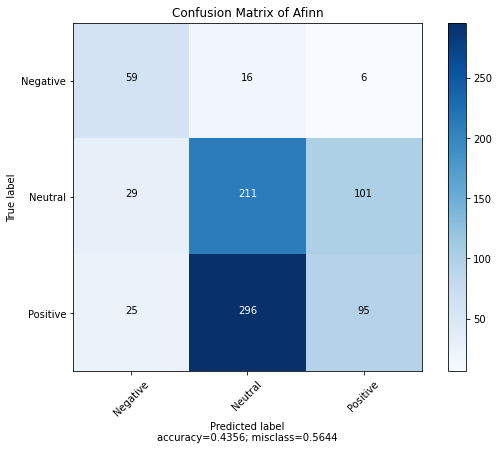

,precision,recall,f1-score,support
Negative,0.522124,0.728395,0.608247,81
Neutral,0.403442,0.618768,0.488426,341
Positive,0.470297,0.228365,0.307443,416
macro avg,0.465288,0.525176,0.468039,838
weighted avg,0.448102,0.435561,0.410164,838


In [17]:
df_ = print_confusion_and_report(df['label'],df['afinn_sent'],"Afinn")

display(df_)

In [18]:

def check(df,label_name1,label1,label_name2,label2):

  count = 0
  for index, row in df.iterrows():
    if row[label_name1] == label1 and row[label_name2] == label2:
      count = count + 1
  
  return count


check(df,'label','Positive','vader_sent','Neutral')

30